In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv(r"C:\Users\sanjiv\Documents\Datasets\365DataScience\Index2018.csv")

In [56]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [57]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [58]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [59]:
df['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [60]:
df.set_index('date', inplace=True)

In [61]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [62]:
df = df.asfreq('d')

In [63]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [64]:
df = df.asfreq('b')

In [65]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [66]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [67]:
df['spx'] = df['spx'].fillna(method='ffill')

In [68]:
df['ftse'] = df['ftse'].fillna(method='bfill')

In [69]:
df['dax'] = df['dax'].fillna(value=df['dax'].mean())

In [70]:
df['market_value'] = df['spx']

In [71]:
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [72]:
df.drop(['spx','dax','ftse','nikkei'], axis=1, inplace=True)

In [73]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [74]:
split_size = int(len(df)*0.7)#70:30 ratio

In [75]:
train = df.iloc[:split_size]
test = df.iloc[split_size:]

In [76]:
train.tail()

,market_value
date,
2010-11-03,1197.961445
2010-11-04,1221.055259
2010-11-05,1225.847867
2010-11-08,1223.246735
2010-11-09,1213.396589


In [77]:
test.head()

,market_value
date,
2010-11-10,1218.708532
2010-11-11,1213.535334
2010-11-12,1199.208309
2010-11-15,1197.751457
2010-11-16,1178.344448


In [78]:
white_noise = np.random.normal(loc=df['market_value'].mean(), scale=df['market_value'].std(), size = len(df))

In [79]:
df['wn'] = white_noise

In [80]:
df.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1286.947747
std,487.868210,484.705104
min,438.920000,-645.403531
25%,992.715221,967.502406
50%,1233.761241,1292.895408
75%,1460.250000,1609.421032
max,2872.867839,3192.288045


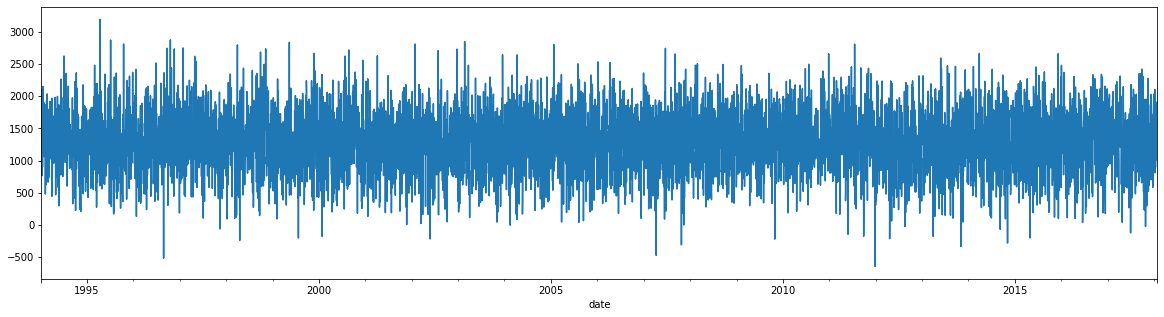

In [81]:
df['wn'].plot(figsize=(20,5))

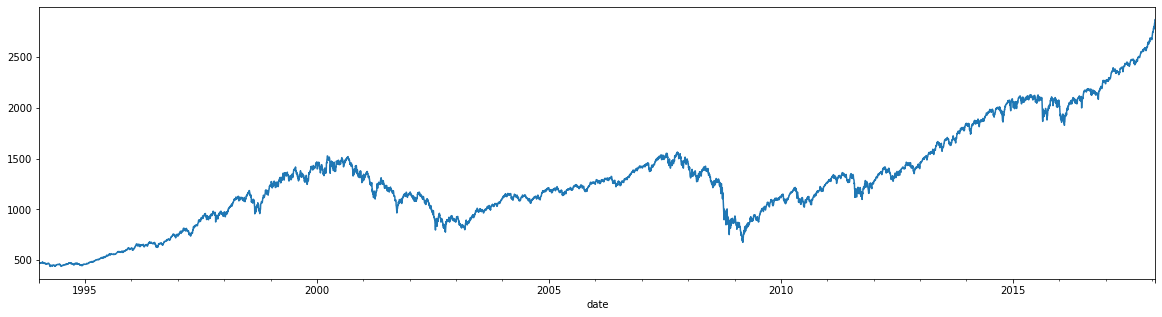

In [82]:
df['market_value'].plot(figsize=(20,5))

In [83]:
rw = pd.read_csv(r"C:\Users\sanjiv\Documents\Datasets\365DataScience\RandWalk.csv")

In [84]:
rw['date'] = pd.to_datetime(rw['date'], dayfirst=True)

In [85]:
rw.set_index('date', inplace=True)

In [86]:
rw = rw.asfreq('b')

In [87]:
df['rw'] = rw['price']

In [88]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1269.822864,1122.139662
1994-01-10,475.27,2100.880759,1080.347860
1994-01-11,474.13,1630.768026,1082.095245
1994-01-12,474.17,1186.034399,1083.639265
1994-01-13,472.47,766.359340,1067.146255


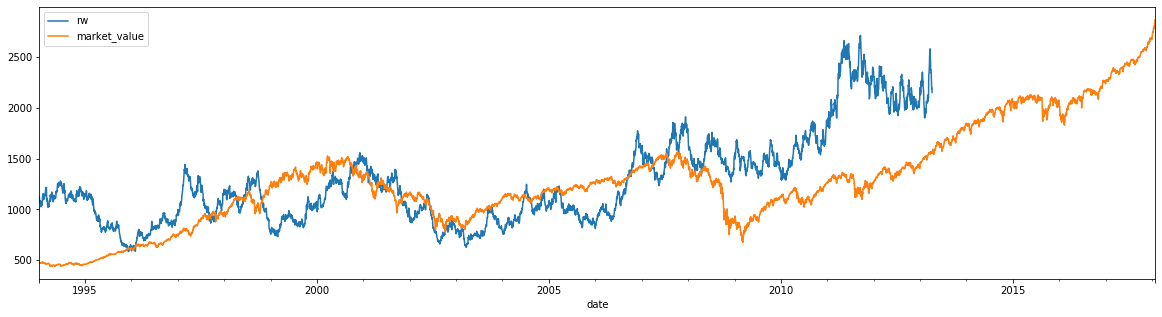

In [89]:
df[['rw', 'market_value']].plot(figsize=(20,5))

In [91]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [92]:
sts.adfuller(df['market_value'])

(1.1194986381728407,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

In [93]:
sts.adfuller(df['wn'])

(-45.187192704180795,
 0.0,
 2,
 6274,
 {'1%': -3.4313927123850956,
  '5%': -2.8620007867175294,
  '10%': -2.5670152737839897},
 94917.67756800419)

In [96]:
df['rw'] = df['rw'].fillna(value=df['rw'].mean())

In [97]:
sts.adfuller(df['rw'])

(-2.4221136905571115,
 0.13559200367427565,
 25,
 6251,
 {'1%': -3.431396550530024,
  '5%': -2.8620024825398054,
  '10%': -2.5670161765106543},
 57894.54330173995)

In [98]:
s_add = seasonal_decompose(df['market_value'], model = 'additive')

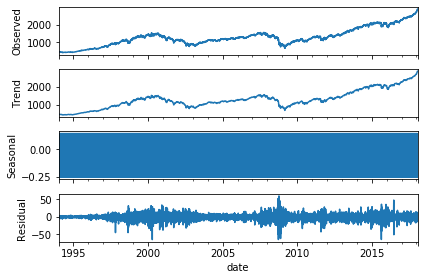

In [100]:
s_add.plot();

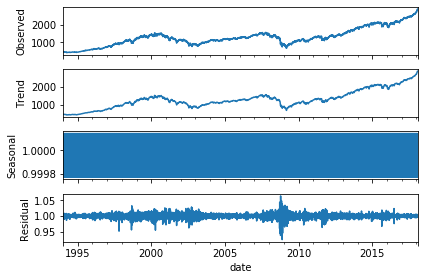

In [101]:
s_mult = seasonal_decompose(df['market_value'], model = 'mutiplicative')
s_mult.plot();

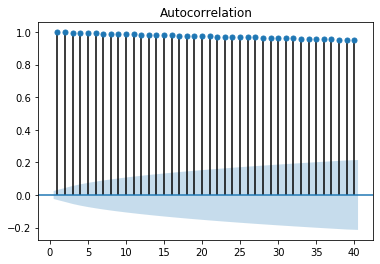

In [104]:
sgt.plot_acf(df['market_value'], lags=40, zero=False);

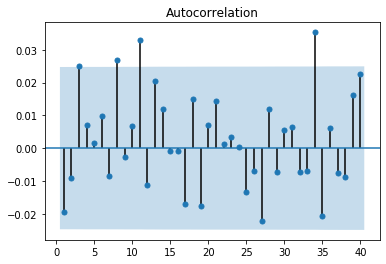

In [107]:
sgt.plot_acf(df['wn'], lags=40, zero=False);

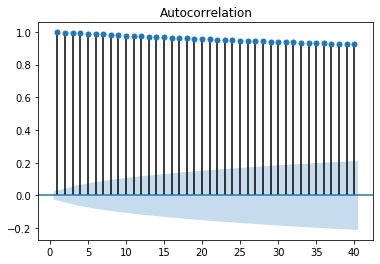

In [109]:
sgt.plot_acf(df['rw'], lags=40, zero=False);

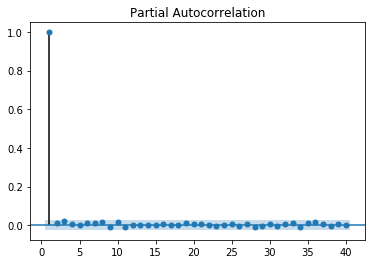

In [111]:
sgt.plot_pacf(df['market_value'], lags=40, zero=False);

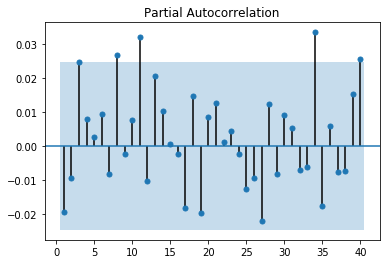

In [113]:
sgt.plot_pacf(df['wn'], lags=40, zero=False);

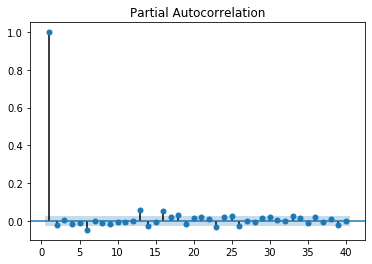

In [115]:
sgt.plot_pacf(df['rw'], lags=40, zero=False);

In [116]:
from statsmodels.tsa.arima_model import ARMA

In [117]:
model_ar1 = ARMA(df['market_value'], order=(1,0))

In [118]:
results_ar1 = model_ar1.fit()

In [119]:
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -25274.743
Method:                       css-mle   S.D. of innovations             13.557
Date:                Tue, 14 Apr 2020   AIC                          50555.486
Time:                        10:35:25   BIC                          50575.720
Sample:                    01-07-1994   HQIC                         50562.496
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1288.7703   1033.999      1.246      0.213    -737.831    3315.372
ar.L1.market_value     0.9999      0.000   8129.683      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [120]:
model_ar2 = ARMA(df['market_value'], order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -25264.882
Method:                       css-mle   S.D. of innovations             13.536
Date:                Tue, 14 Apr 2020   AIC                          50537.763
Time:                        11:20:20   BIC                          50564.742
Sample:                    01-07-1994   HQIC                         50547.111
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1288.6696   1072.003      1.202      0.229    -812.417    3389.757
ar.L1.market_value     0.9439      0.001    940.901      0.000       0.942       0.946
ar.L2.market_value     0.0560      0.001     55.843      0.000       0.054       0.058
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
AR.2          -17.8479           +0.0000j           17.8479            0.5000
-----------------------------------------------------------------------------
"""

In [121]:
model_ar3 = ARMA(df['market_value'], order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -25261.700
Method:                       css-mle   S.D. of innovations             13.529
Date:                Tue, 14 Apr 2020   AIC                          50533.400
Time:                        11:22:48   BIC                          50567.123
Sample:                    01-07-1994   HQIC                         50545.085
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1288.6538   1091.328      1.181      0.238    -850.311    3427.618
ar.L1.market_value     0.9421      0.001   1040.099      0.000       0.940       0.944
ar.L2.market_value     0.0259      0.013      2.054      0.040       0.001       0.051
ar.L3.market_value     0.0319      0.013      2.527      0.012       0.007       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           -0.0000j            1.0001           -0.0000
AR.2           -0.9074           -5.5291j            5.6031           -0.2759
AR.3           -0.9074           +5.5291j            5.6031            0.2759
-----------------------------------------------------------------------------
"""

In [122]:
model_ar4 = ARMA(df['market_value'], order=(4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -25260.640
Method:                       css-mle   S.D. of innovations             13.527
Date:                Tue, 14 Apr 2020   AIC                          50533.281
Time:                        11:23:37   BIC                          50573.749
Sample:                    01-07-1994   HQIC                         50547.302
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1288.6554   1100.926      1.171      0.242    -869.121    3446.431
ar.L1.market_value     0.9415      0.001   1097.570      0.000       0.940       0.943
ar.L2.market_value     0.0255      0.013      2.015      0.044       0.001       0.050
ar.L3.market_value     0.0145      0.017      0.838      0.402      -0.019       0.049
ar.L4.market_value     0.0184      0.013      1.457      0.145      -0.006       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           -0.0000j            1.0001           -0.0000
AR.2           -4.1643           -0.0000j            4.1643           -0.5000
AR.3            1.1870           -3.4137j            3.6142           -0.1967
AR.4            1.1870           +3.4137j            3.6142            0.1967
-----------------------------------------------------------------------------
"""

In [123]:
from scipy.stats.distributions import chi2
def LLR_test(model1, model2, deg_freedom = 1):
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, deg_freedom)
    return p

In [124]:
LLR_test(model_ar2, model_ar3)

ValueError: x contains a constant. Adding a constant with trend='c' is not allowed.

In [126]:
df['returns'] = df['market_value'].pct_change(1).mul(100)

In [127]:
df['returns']

date
1994-01-07         NaN
1994-01-10    1.142796
1994-01-11   -0.239864
1994-01-12    0.008437
1994-01-13   -0.358521
                ...   
2018-01-23    0.217307
2018-01-24   -0.055875
2018-01-25    0.060229
2018-01-26    1.183931
2018-01-29   -0.673175
Freq: B, Name: returns, Length: 6277, dtype: float64

In [128]:
df= df.iloc[1:]

In [129]:
df.head()

,market_value,wn,rw,returns
date,,,,
1994-01-10,475.27,2100.880759,1080.347860,1.142796
1994-01-11,474.13,1630.768026,1082.095245,-0.239864
1994-01-12,474.17,1186.034399,1083.639265,0.008437
1994-01-13,472.47,766.359340,1067.146255,-0.358521
1994-01-14,474.91,2013.395279,1080.129720,0.516435


In [130]:
sts.adfuller(df['returns'])

(-14.173447277641293,
 1.9848251568207018e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19221.15032513027)